In [94]:
# Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')






In [95]:
csv_path = r'C:\Users\vinay punnamaraju pc\Dropbox\PC\Downloads\test.csv'
df = pd.read_csv(csv_path)
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [96]:
df.shape

(1000, 21)

In [97]:
df.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [99]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


**Checking for null values**

In [100]:
df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [101]:
!pip install missingno



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


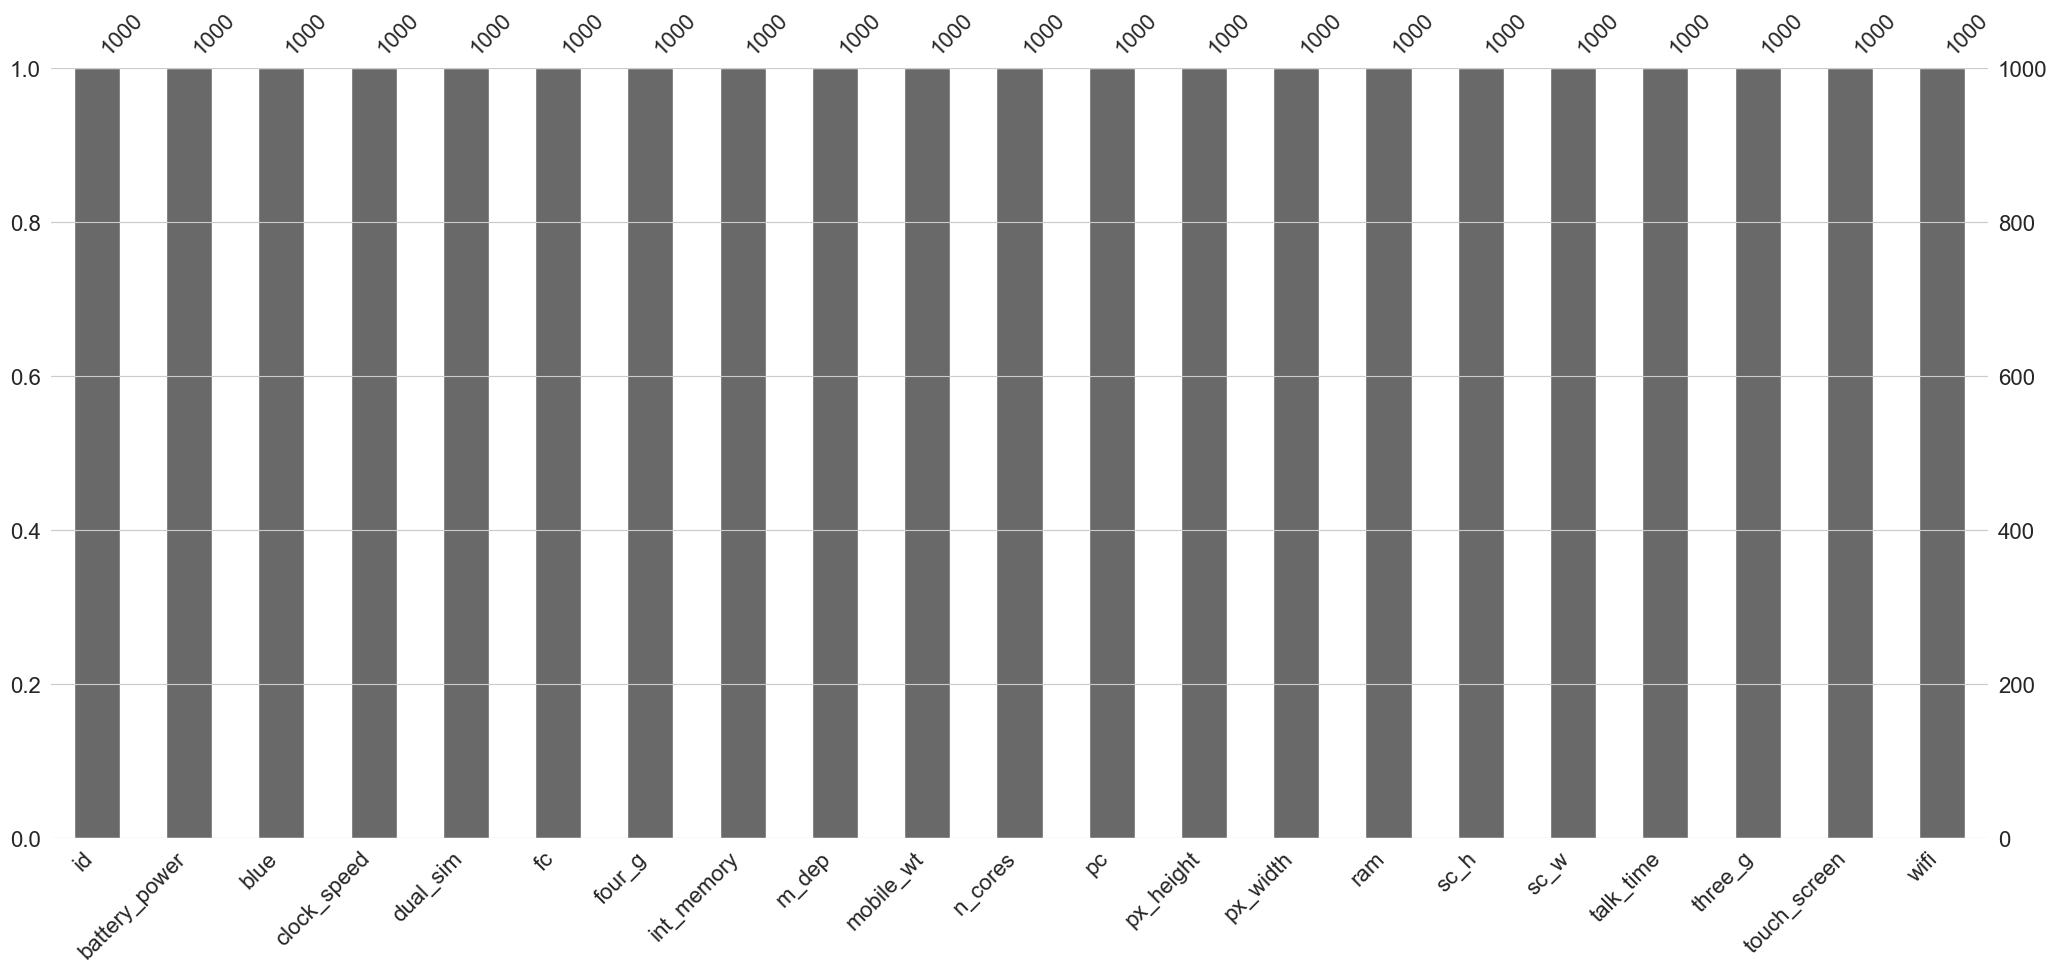

In [102]:
import missingno as msno
msno.bar(df)
plt.show()


**Checking the variance**

In [103]:
df.var()

id               8.341667e+04
battery_power    1.870201e+05
blue             2.499940e-01
clock_speed      6.876849e-01
dual_sim         2.499610e-01
fc               1.992127e+01
four_g           2.500811e-01
int_memory       3.286495e+02
m_dep            7.888263e-02
mobile_wt        1.214631e+03
n_cores          5.235652e+00
pc               3.715023e+01
px_height        1.874281e+05
px_width         1.933106e+05
ram              1.183945e+06
sc_h             1.866764e+01
sc_w             1.797812e+01
talk_time        3.022400e+01
three_g          1.846486e-01
touch_screen     2.502503e-01
wifi             2.502012e-01
dtype: float64

In [104]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [105]:
df['battery_power'].unique()

array([1043,  841, 1807, 1546, 1434, 1464, 1718,  833, 1111, 1520, 1500,
       1343,  900, 1190,  630, 1846, 1985, 1042, 1231, 1488,  968,  529,
       1558,  533, 1037, 1025, 1858,  980,  644, 1024, 1981, 1380, 1557,
       1201, 1074, 1175, 1280, 1715, 1165,  567, 1952,  822,  685, 1388,
       1972, 1411, 1094, 1653,  916, 1712,  882,  632, 1442, 1630, 1596,
       1272, 1640, 1889, 1907,  578, 1634, 1533,  660, 1847, 1206,  549,
       1705, 1366, 1991, 1102, 1452, 1810, 1166,  881, 1134, 1031, 1376,
       1391,  979, 1075, 1999, 1626,  942, 1182, 1982, 1373, 1151, 1650,
       1663, 1965,  679, 1465, 1809,  757, 1034, 1119,  559, 1204, 1008,
       1397,  697, 1939, 1039, 1605,  769,  861,  504, 1930, 1795, 1363,
       1901, 1319,  859, 1664,  955,  517, 1806, 1348, 1455, 1611, 1573,
        557, 1599, 1051, 1857, 1986,  591, 1140,  923, 1582,  723, 1251,
        574,  948, 1571,  564, 1466,  597,  895, 1535, 1832, 1045, 1483,
        976, 1840,  624, 1963, 1307, 1933, 1496, 15

# Exploratory Data Analysis

**Relationship between ram and price**

In [106]:
print(df.columns)


Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [107]:
import pandas as pd

# Assuming other columns are present in your DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'battery_power': [1043, 841, 1807, 1546, 1434],
    # Add other columns here
}

df = pd.DataFrame(data)
df['price_range'] = [1, 2, 1, 3, 4]  # Add the 'price_range' column

print(df)


   id  battery_power  price_range
0   1           1043            1
1   2            841            2
2   3           1807            1
3   4           1546            3
4   5           1434            4


Index(['id', 'battery_power', 'price_range'], dtype='object')
int64
int64


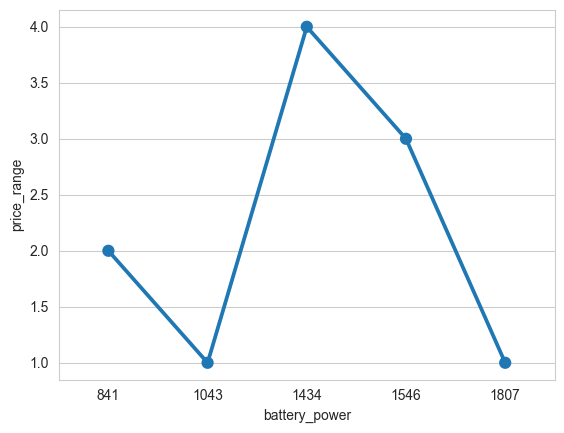

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Double-check the column names and data types
print(df.columns)
print(df['battery_power'].dtype)
print(df['price_range'].dtype)

# Assuming 'price_range' is the correct column name
sns.pointplot(x='battery_power', y='price_range', data=df)

plt.show()


<Axes: xlabel='price_range', ylabel='battery_power'>

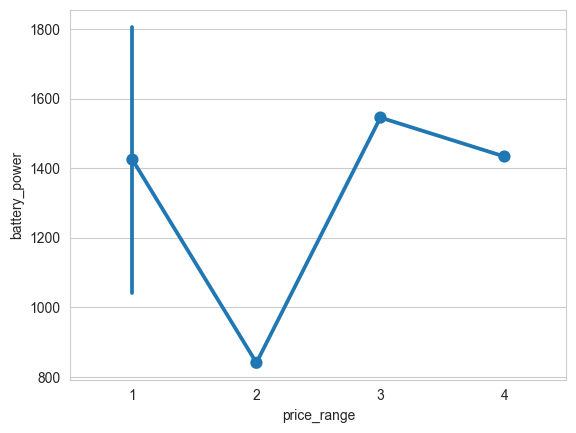

In [109]:
sns.pointplot(y='battery_power',x='price_range',data=df)

**Relationship between battery and price**

<Axes: xlabel='price_range', ylabel='battery_power'>

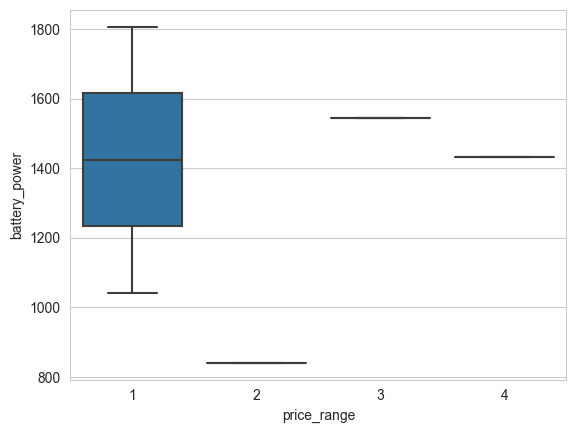

In [110]:
sns.boxplot(x='price_range',y='battery_power',data=df)

**Relationship between memory and price**

In [111]:
col = df.columns
col


Index(['id', 'battery_power', 'price_range'], dtype='object')

In [112]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

 **Count Plot for all the columns**

**Histogram**

**Checking the correlation by plotting correlation plot.**

Text(0.5, 1.0, 'Correlation ')

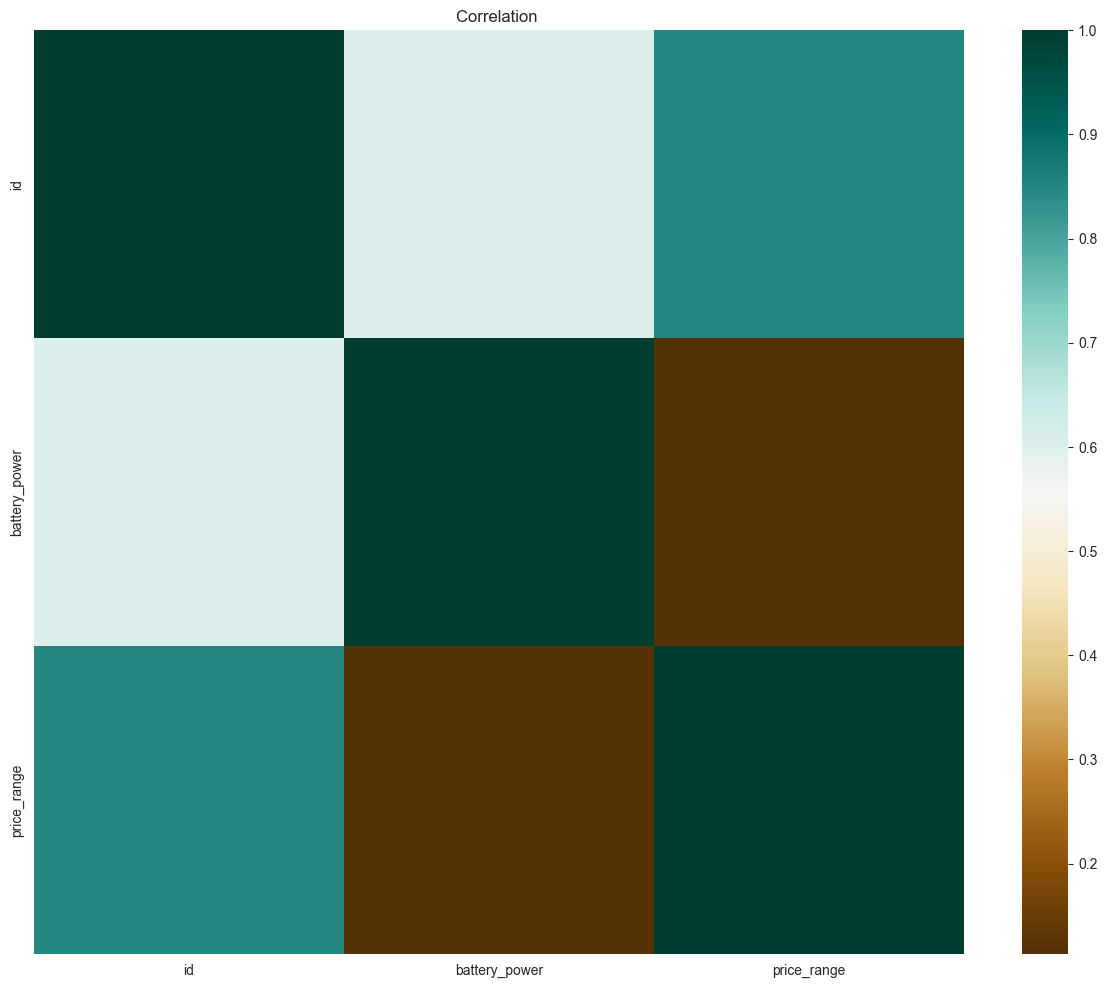

In [113]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

In [114]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [115]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

ModuleNotFoundError: No module named 'statsmodels'

So,VIF is less than 5.So, There is no multicollinearity.

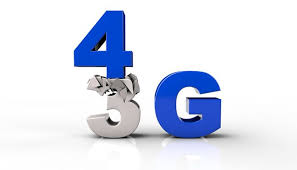

**3G supported phones**

**4G supported phones**

# Models

**2.KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)

knn_acc=accuracy_score(y_test_pred1,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred1,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred1,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred1,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred1,y_test))

Train Set Accuracy:95.13333333333334
Test Set Accuracy:89.8

Confusion Matrix:
[[124  15   0   0]
 [  1 104  12   0]
 [  0   6 110  14]
 [  0   0   3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       139
           1       0.83      0.89      0.86       117
           2       0.88      0.85      0.86       130
           3       0.89      0.97      0.93       114

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



**4.DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_pred3 = dtc.predict(x_test)
y_train_pred3=dtc.predict(x_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:79.80000000000001

Confusion Matrix:
[[112  15   0   0]
 [ 13  93  21   1]
 [  0  17  84  14]
 [  0   0  20 110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       127
           1       0.74      0.73      0.74       128
           2       0.67      0.73      0.70       115
           3       0.88      0.85      0.86       130

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [ ]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 7}

In [ ]:
dtc = grid_search.best_estimator_

In [ ]:
y_predi=dtc.predict(x_test)

In [ ]:
dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_predi)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.9253333333333333
Test Accuracy of SVC Model is 0.836


**5.AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                                                min_samples_leaf=7,
                                                                                min_samples_split=7)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
grid_search.best_params_


{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 180}

In [ ]:
grid_search.best_score_

0.9193333333333333

In [ ]:
ad = grid_search.best_estimator_
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=7,
                                                         min_samples_leaf=7,
                                                         min_samples_split=7),
                   learning_rate=1, n_estimators=180)

In [ ]:
y_pred = ad.predict(x_test)

In [ ]:
ada_train_acc = accuracy_score(y_train, ad.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 0.916


**6.GradientBoostingClassifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_test_pred6 = gbc.predict(x_test)
y_train_pred6=gbc.predict(x_train)

gbc_acc=accuracy_score(y_test_pred6,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred6,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred6,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred6,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred6,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:90.8

Confusion Matrix:
[[121   8   0   0]
 [  4 108  10   0]
 [  0   9 111  11]
 [  0   0   4 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       129
           1       0.86      0.89      0.87       122
           2       0.89      0.85      0.87       131
           3       0.91      0.97      0.94       118

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



**7.XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 10,gamma=5)
xgb.fit(x_train, y_train)

y_test_pred7 = xgb.predict(x_test)
y_train_pred7=xgb.predict(x_train)

xgb_acc= accuracy_score(y_test_pred7,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred7,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred7,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred7,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred7,y_test))

[17:54:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Set Accuracy:93.06666666666666
Test Set Accuracy:84.6

Confusion Matrix:
[[118  15   0   0]
 [  7 101  21   0]
 [  0   9  95  16]
 [  0   0   9 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       133
           1       0.81      0.78      0.80       129
           2       0.76      0.79      0.78       120
           3       0.87      0.92      0.90       118

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



***SVC Classifier got the highest accuracy.***

